# Learn What is LSTM and How to use it 

In [2]:
from IPython.display import Image, display_png

## LSTM is based on RNN (Recurent Neural Network)

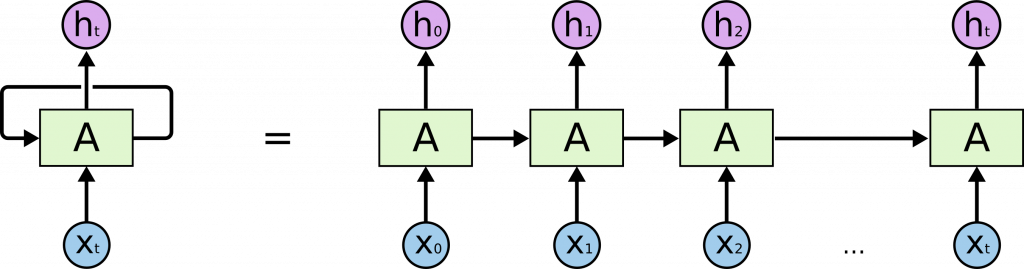

In [3]:
display_png(Image('./images/RNN-unrolled.png'))

## LSTM have gates to maintain Memory efficiently (Aの中身)

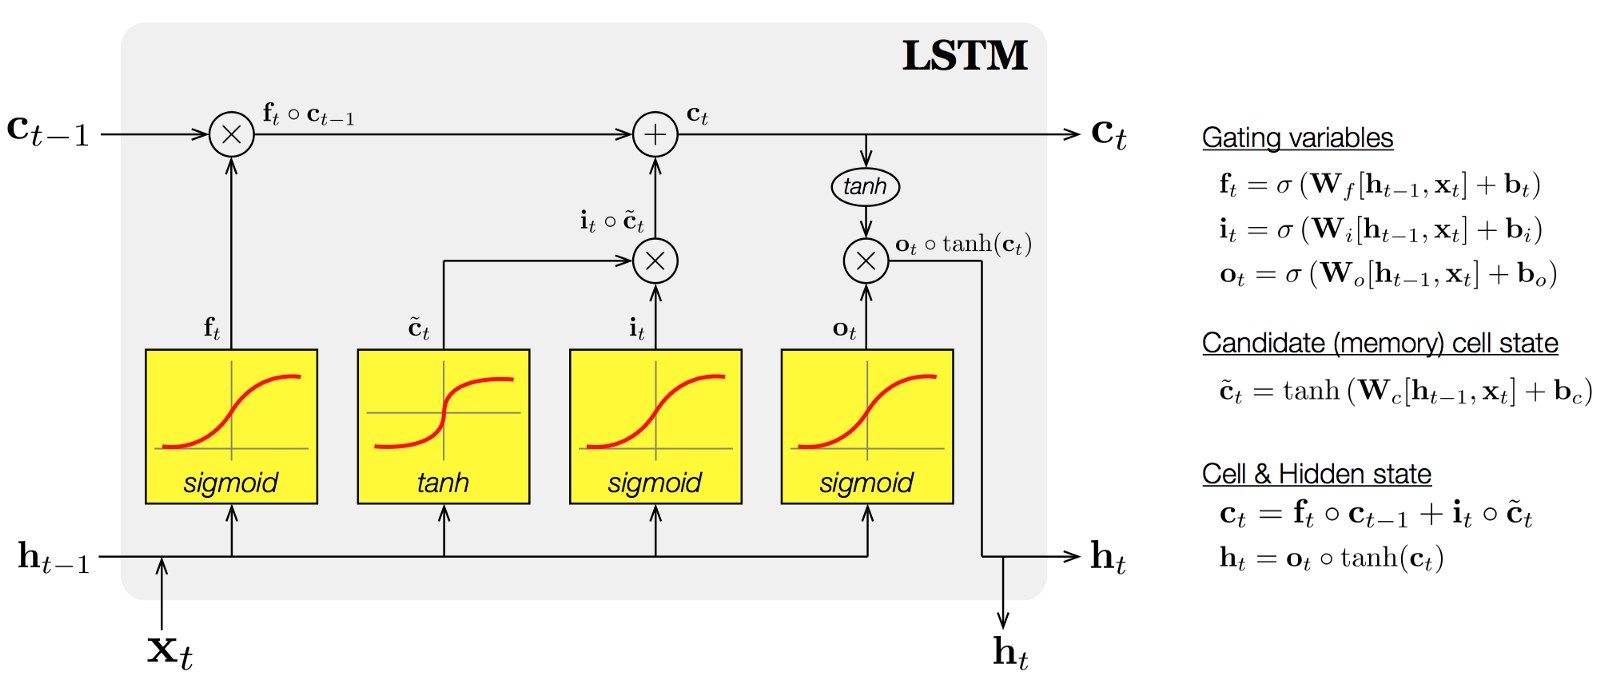

In [4]:
display_png(Image('./images/lstm_architecture.png'))

In [8]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [30]:
x = np.arange(0, 10, 0.02)
y = np.sin(3*x)*np.exp(-x/10)

In [40]:
# ノイズを付与する
def noise_f(y):
    x = np.arange(0, 500)
    noise = 0.05 * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return y + noise

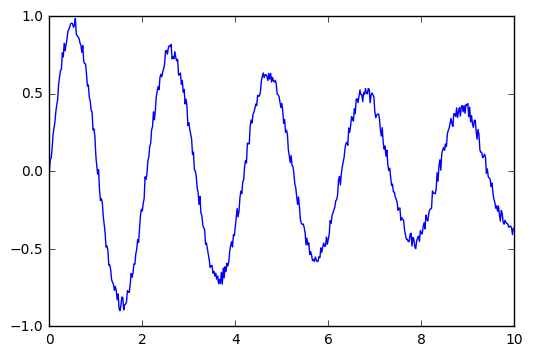

In [41]:
plt.plot(x, noise_f(y))

## - Step 1 : この波を学習させる
## - Step 2 : 未来の波を予測する

In [33]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


## 学習データセットの用意

## `f[t],f[t+1],f[t+2], ... , f[t+24] => f[t+25]`

In [49]:
def make_dataset(low_data):

    data, target = [], []
    maxlen = 25

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])

    reshaped_data = np.array(data).reshape(len(data), maxlen, 1)
    reshaped_target = np.array(target).reshape(len(data), 1)

    return reshaped_data, reshaped_target


#g -> 学習データ，h -> 学習ラベル
x, h = make_dataset(noise_f(y))
print('data_shape: {}, target_shape: {}'.format(x.shape, h.shape))

data_shape: (475, 25, 1), target_shape: (475, 1)


## モデルの作成

In [50]:
length_of_sequence = x.shape[1]  # 25
in_out_neurons = 1
n_hidden = 300

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

## 学習

In [51]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)
model.fit(x, h,
          batch_size=20,
          epochs=100,
          validation_split=0.1,
          callbacks=[early_stopping]
          )

Train on 427 samples, validate on 48 samples
Epoch 1/100
427/427 [==============================] - 2s 4ms/step - loss: 0.0402 - val_loss: 0.0020
Epoch 2/100
427/427 [==============================] - 1s 2ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 3/100
427/427 [==============================] - 1s 2ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 4/100
427/427 [==============================] - 1s 2ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/100
427/427 [==============================] - 1s 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 6/100
427/427 [==============================] - 1s 2ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/100
427/427 [==============================] - 1s 2ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 8/100
427/427 [==============================] - 1s 2ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 9/100
427/427 [==============================] - 1s 2ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 10/100
427/427 [========================

## 波の学習結果

In [52]:
predicted = model.predict(x)

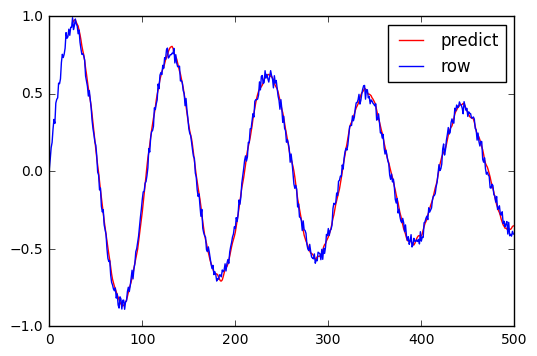

In [54]:
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict")
plt.plot(range(0, len(noise_f(y))), noise_f(y), color="b", label="row")
plt.legend()
plt.show()

## 未来の予測

In [79]:
future_test = x[-1]
# 未来の予測データを保存していくリスト
future_result = []

for _ in range(500):

    test_data = np.reshape(future_test, (1, length_of_sequence, 1))
    batch_predict = model.predict(test_data)
    #一番古いデータを1つ捨てて、推論したデータを1つ追加する
    future_test = np.delete(future_test, 0)
    future_test = np.append(future_test, batch_predict)

    future_result.append(batch_predict[0])

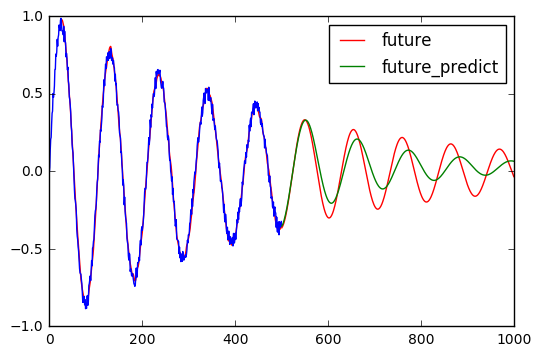

In [86]:
future_x = np.arange(10, 20, 0.02)
future_y = np.sin(3*future_x )*np.exp(-future_x /10)

plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r")
plt.plot(range(0, len(noise_f(y))), noise_f(y), color="b")
plt.plot(range(len(noise_f(y)), len(future_result)+len(noise_f(y))), future_y, color="r", label="future")
plt.plot(range(len(noise_f(y)), len(future_result)+len(noise_f(y))), future_result, color="g", label="future_predict")
plt.legend()
plt.show()